In [1]:
import json
import os
import cv2
import matplotlib.pyplot as plt

In [8]:
json_path = './data/instances_default2.json'

with open(json_path, 'r', encoding='utf-8') as j:
    json_data = json.load(j)

print(json_data)

{'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'car', 'supercategory': ''}], 'images': [{'id': 1, 'width': 960, 'height': 720, 'file_name': 'license_plate.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}], 'annotations': [{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 443820.6472, 'bbox': [43.94, 101.77, 857.26, 517.72], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}]}


In [10]:
categories = json_data['categories']
images = json_data['images']
annotations = json_data['annotations']

print(images)
print(annotations)

label_dict = {1: 'car'}

[{'id': 1, 'width': 960, 'height': 720, 'file_name': 'license_plate.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]
[{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 443820.6472, 'bbox': [43.94, 101.77, 857.26, 517.72], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}]


좌표:  43 101 857 517
car


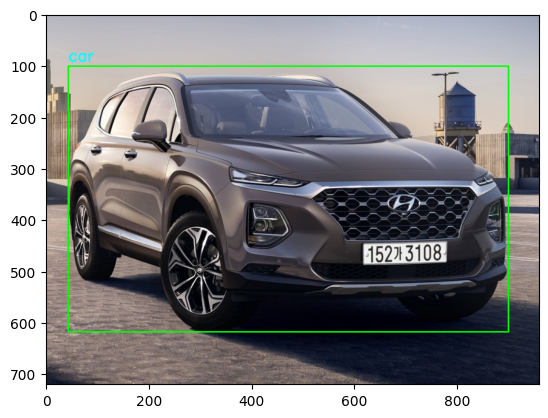

In [23]:
for image in images:
    image_name = image['file_name']
    image_path = os.path.join('./data/',image_name)
    image_id = image['id']
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    for annotation in annotations:
        if image_id == annotation['id']:
            bbox = annotation['bbox']
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            print('좌표: ', x,y,w,h)
            
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            label = label_dict[annotation['category_id']]
            print(label)

            img = cv2.putText(img, label, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2, cv2.LINE_AA)
            
plt.imshow(img)
plt.show()